<a href="https://colab.research.google.com/github/LuisMig-code/NLP-com-Reviews-de-roupas-femininas/blob/main/NLP_Reviews_roupas_femininas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP com Reviews de Roupas Femininas (E-Commerce) :

**A venda de Roupas é e sempre será um setor estratégico**. Gera empregos no mundo todo (para diversas áreas) , além de fundamental para o ser humano (afinal , ninguém quer andar sem elas...). Pensando nisso , e com o avançar da industria e as tendências da moda , indivíduos dão suas opiniões online sobre suas roupas e classificam elas. 

<img src="https://images.pexels.com/photos/1140907/pexels-photo-1140907.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" width=800>

Nesse sentido , trago hoje um artigo sobre **NLP** (*Natural Language Processing*) ou **Processamento de Linguagem Natural** para entendermos um pouco mais sobre como máquinas tem ajudado a entender um pouco mais a linguagem humana!

## Contexto:

> *Este é um conjunto de dados de comércio eletrônico de roupas femininas que gira em torno de avaliações escritas por clientes. Seus nove recursos de suporte oferecem um ótimo ambiente para analisar o texto em suas múltiplas dimensões. Por se tratar de dados comerciais reais, eles foram tornados anônimos e as referências à empresa no texto e no corpo da avaliação foram substituídas por “varejista”.*

**Aqui iremos prever uma nota (1 - 5) a partir de um texto (review) em um site de roupas**


## Nossos Dados:

Os dados obitidos para essa análise foram extraido do site [Kaggle](https://www.kaggle.com/static/images/site-logo.png) , e você pode acessá-los clicando [**aqui**](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Kaggle_logo.png/200px-Kaggle_logo.png">

### **O que temos em nosso conjunto de dados?**

No conjunto de dados completo temos um total de 11 colunas (ou variáveis/features) :

* **Clothing ID**: Variável categórica inteira que se refere à peça específica que está sendo avaliada.
* **Age**: Variável inteira positiva da idade dos revisores.
* **Title**: Variável de string para o título da resenha.
* **Review Text**: Variável de string para o corpo da revisão.
* **Rating**: Variável inteira ordinal positiva para a pontuação do produto concedida pelo cliente de 1 Pior a 5 Melhor.
* **Recommended IND**: Variável binária informando onde o cliente recomenda o produto, onde 1 é recomendado, 0 não é recomendado.
* **Positive Feedback Count**: Número inteiro positivo documentando o número de outros clientes que acharam esta avaliação positiva.
* **Division Name**: Nome categórico da divisão de alto nível do produto..
* **Department Name**: Nome categórico do nome do departamento do produto.
* **Class Name**: Nome categórico do nome da classe do produto.


Há uma infinidade de possiblidades que podemos fazer com esse conjunto de dados (*Dataset*) , mas por ora vou me limitar a apenas a usar as variáveis de "*Review Text*" e "*Rating*".

## Imports Necessários:

Vamos começar fazendo o import das Bibliotecas python necessárias para fazer nossas análises :

In [1]:
# NLTK
from nltk import word_tokenize
import nltk
import re

# imports para plotar o WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

# importantes para análises de dados
import pandas as pd
import numpy as np

# import do vetorizador das palavras e o Algorítimo usado nas predições
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# imports das métricas de predição/resultado
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# temporizador:
import time

In [2]:
# fazendo o download de pacotes necessários ao NLTK
nltk.download('rslp')
nltk.download('stopwords')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Quando se trabalha com análises de texto é comum fazermos alguns pré-processamentos básicos neles, como remoção de links que prejudiquem o treinamento do modelo , assim como remoçar de emotes e as stopwords (palavras que não agregam na compreensão do texto)

In [3]:
def Preprocessing(instancia):
    # instanciando o método stemmer
    stemmer = nltk.stem.RSLPStemmer()

    # removendo links do texto
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')

    # agregando as stopwords em uma lista
    stopwords = set(nltk.corpus.stopwords.words('english'))

    # removendo as stopwords da frase
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    
    return (" ".join(palavras))

## Lendo nossos dados:

<img src="https://image.freepik.com/free-vector/lecture-time-concept-illustration_52683-26701.jpg">

In [4]:
link = "https://raw.githubusercontent.com/LuisMig-code/NLP-com-Reviews-de-roupas-femininas/main/data/Womens%20Clothing%20E-Commerce%20Reviews.csv"

In [5]:
df = pd.read_csv(link)

In [6]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


O primeiro fato que eu gostaria de ressaltar é que temos uma coluna nomeada *Unnamed: 0* , que será removida pois foi um erro tê-la no Dataset

In [7]:
df = df.drop(["Unnamed: 0"] , axis = 1)

## Pré-Análises:

É interessante termos logo noção de quantas instancias temos em nosso Dataset , para isso , vamos visualizar a quantidade de dados totais:

In [8]:
print("Em nosso conjunto de dados temos : {} linhas e {} colunas".format(df.shape[0] , df.shape[1]))

Em nosso conjunto de dados temos : 23486 linhas e 10 colunas


Para nossas pré análises , é importante também saber a quantidade de dados nulos/faltantes , visto que eles podem alterar no desempenho do modelo.

In [9]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Para as colunas que nos servem (*Review Text* e *Rating*) , temos pouco mais de 845 dados faltantes na coluna *Review Text*. A fim de evitar qualquer problema nas análsies , vamos removê-las do nosso conjunto de dados.

In [10]:
df.dropna(subset=["Review Text"],inplace=True)

Além disso , é importante que saibamos também se existem dados duplicados em nosso dataset , pois podem afetar também o nosso modelo.

In [11]:
df.duplicated().sum()

1

Em todo nosso conjunto de dados temos apenas 1 amostra duplicada , ainda assim temos de removê-las:

In [12]:
df.drop_duplicates(inplace=True)

Feito isso , vamos ver a quantidade de amostras que ainda temos:

In [13]:
print("Em nosso conjunto de dados temos : {} linhas".format(df.shape[0]))

Em nosso conjunto de dados temos : 22640 linhas


Diminuímos em pouco mais de mil dados nosso conjunto

### Distribuições:

Como iremos usar apenas 2 variáveis , e somente uma delas é numérica , é interessante que também saibamos como ela se distribui :

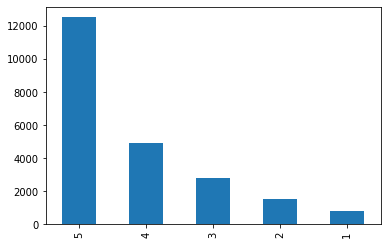

In [14]:
df.Rating.value_counts().plot(kind="bar")

O que já podemos notar é que temos muito mais classificações 5, isso irá trazer problemas na construção do modelo (que será explicado posteriormente). Mas quantos dados temos para cada caso?

In [15]:
for i,z in zip( df.Rating.value_counts().index , df.Rating.value_counts().values ):
  print("Para a classificação {} , temos um total de {} amostras".format(i,z))

Para a classificação 5 , temos um total de 12539 amostras
Para a classificação 4 , temos um total de 4908 amostras
Para a classificação 3 , temos um total de 2823 amostras
Para a classificação 2 , temos um total de 1549 amostras
Para a classificação 1 , temos um total de 821 amostras


## Análises:

<img src="https://image.freepik.com/free-vector/data-inform-illustration-concept_114360-864.jpg">

Como dito anteriormente , somente iremos trabalhar com 2 variáveis , para tal , vamos começar separando os vlores de texto(analises):

In [16]:
reviews = df['Review Text']

Com nossos textos em mãos (ou variáveis haha) vamos fazer alguns processamentos nele. 

**Mas quais processamentos são esses ?** De forma resumida , iremos remover algumas palavras chamadas de *StopWords* (algo como palavras de parada) , que de forma resumida são **palavras que não agregam em nada** na compreensão da máquina de interpretar(Ex: "é" , "da" , "o" e etc.) . Além disso vamos remover emotes ou links que podem estar no texto , que também não agregam sentido a análise das roupas. Vamos usar um também um "*Stemmator*" que **remove os sufixos de uma palavra** ajudando na generalização dela.

In [17]:
inicio = time.time()

reviews_processed = [Preprocessing(i) for i in reviews]

fim = time.time()
tempo = fim - inicio

print("Para processar {} frases , demorou {}segundos".format( len(reviews) , round(tempo) ))

Para processar 22640 frases , demorou 51segundos


A fim de nos manter mais organizados , vou criar uma nova coluna em nosso dataset principal para que possamos amrmazenar estes dados:

In [18]:
df["Review_Text_processed"] = reviews_processed

Como resultamos obtivemos o seguinte dataset

In [19]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review_Text_processed
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortabl
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"lov dress! soo pretty happened find store, i'm..."
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hop dres really wanted work initially ord...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"love, love, lov jumpsuit fun, flirty, fabulous..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustabl front tie perfe...


## Machine Learning

<img src="https://image.freepik.com/free-vector/innovation-concept-illustration_114360-5848.jpg">

Agora que já temos nossos dados de texto processados , chegou a hora de por a mão na massa e de fato começar a fazer o computador predizer notas para as análises!

A primeira coisas que temos de fazer , assim como em toda construção de modelo de Machine Learning , é a separação dos nossos dados em *features* e *target* , ou seja , os valores de **X** e **y** respectivamente.

In [20]:
X = df.drop(["Clothing ID","Positive Feedback Count","Review_Text_processed","Review_Text_processed","Rating"] , axis=1)
X_processed = df.drop(["Clothing ID","Positive Feedback Count","Review Text","Title","Rating"] , axis=1)
y = df["Rating"]

Outro ponto a ser destacado é: **Máquinas não interpretam textos!** Isso mesmo , maquinas não tem a capacidade de interpretar textos.... Algoritmos de Aprendizado de Máquinas apenas interpretam (conseguem "ler") **números** . Então o que vamos fazer ? Simples,  vamos transformar nossos textos em números ,usando o que chamamos de *Vetorizador* .

Este vetorizador nada mais é do que um algoritmo de extração de *features* textuais. Com ele transformamos textos em números.

Vamos ver um exemplo?

In [21]:
frase = ["Olá Mundo!","Olá , Meu nome é Luís Miguel"]

In [22]:
vetorizador = CountVectorizer(analyzer="word")

In [23]:
frase = vetorizador.fit_transform(frase)

In [24]:
print(frase)

  (0, 5)	1
  (0, 3)	1
  (1, 5)	1
  (1, 1)	1
  (1, 4)	1
  (1, 0)	1
  (1, 2)	1


Na tupla que recebemos temos o seguinte : (**index na lista** , **valor numérico para a palavras**)

Como usei a palavras "Olá" para ambas as frases , podemos ver que de fato temos o mesmo valor para ela em ambas as as tuplas , no caso p valor é o número 5!

Agora que já sabemos como usar o *CountVectorizer* , vamo aplicá-los nos nossos dados.

In [25]:
reviews_processed = vetorizador.fit_transform(reviews_processed)

Agora que já temos os nossos dados vetorizados, chegou a hora de fazer uma repartição nesse conjunto. **Repartição**? Mas por que? Em modelos de Machine Learning é comum que façamos uma divisão em nossos dados entre **treino** e **teste** , isso para poder saber qual a acurácia (taxa de acertividade do modelo)!

In [26]:
# divisão dos dados:
X_treino, X_teste, y_treino, y_teste = train_test_split(reviews_processed , y , random_state=42 , stratify=y)

Agora que temos nossos dados divididos , chegou a hora mais importante , criar o modelo . Um problema recorrente para Cientista de Dados no geral é **qual modelo/algoritmo escolher?** . Por hora não irei entrar muito a fundo nesse debate , o fato é que quando se trabalha com NLP (Processamento de Linguagem Natural) o algoritmo mais comum a se usar é o **MultinomialNB** do *Naive Bayes*

**Mas afinal , por que o *Naive Bayes* é bom para NLP?**

De forma genérica , o *Naive Bayes* é ultilizado para predizer a chance de um evento acontecer baseado nos dados presentes . Além disso , o fato dele ser *Naive* ("Ingênuo") ele desconsidera relações entre as variáveis , como só temos números que representam textos a relação entre as variáveis são quase nulas.

**Mas por que usaremos o MultinomialNB ?**

O Multinomial é mais adequeado para variáveis que descrevem **frequências discretas** (contagem de palavras, por exemplo)

Vamos criar agora o modelo?

In [27]:
modelo = MultinomialNB()

A partir dos nossos dados de Treino (que dividimos anteriormente) vamos treinar nosso modelo para fazer classificações!

In [28]:
modelo.fit(X_treino , y_treino)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Agora que temos um modelo treinado podemos começar a fazer predições a partir dos dados de teste:

In [29]:
predicoes = modelo.predict(X_teste)

Chegou a parte mais importante, saber o quão bom é nosso modelo. Para isso vamos ver o resultado:

In [30]:
acuracia = accuracy_score(y_teste , predicoes)
print('Acurácia : {}'.format(round(acuracia,2)))
print(classification_report(y_teste , predicoes , target_names=["Nota 1","Nota 2","Nota 3","Nota 4","Nota 5"]))

Acurácia : 0.61
              precision    recall  f1-score   support

      Nota 1       0.32      0.03      0.05       205
      Nota 2       0.26      0.06      0.10       387
      Nota 3       0.37      0.36      0.37       706
      Nota 4       0.37      0.34      0.35      1227
      Nota 5       0.74      0.88      0.80      3135

    accuracy                           0.61      5660
   macro avg       0.41      0.33      0.34      5660
weighted avg       0.57      0.61      0.58      5660



A acurácia do nosso modelo no geral foi bem baixa (pouco mais de 61%) , mas por que? Anteriormente eu já havia ressaltado que tinhamos quantidade diferentes de valores para as notas , **haviam mais notas 5 do que nota 1** , isso implica dizer que nosso modelo treinou mais com notas 5 do que 1 , por fim , teremos maior precisão ao predizer reviews que sejam 5 .

A fim de resolver esse problema usarei o algoritmo SMOTE e NearMiss.

Não sabe o que é isso? [confira aqui](https://luis-miguel-code.medium.com/como-lidar-com-classes-desbalanceadas-em-machine-learning-precision-recall-oversampling-e-ce21e3ccb615) outro artigo meu explicando detalhadamente ele.

### **Smote:**

In [31]:
# importando o SMOTE:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
# instanciando o SMOTE:
smote = SMOTE()

Vamos aplicar o SMOTE em nossos dados de Reviews e Notas

In [33]:
Smote_reviews , Smote_y = smote.fit_sample(reviews_processed , y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Com os dados com o SMOTE já aplicados , basta aplicar agora esses dados na criação do nosso modelo.

Vamos repetir o processo de criação do modelo novamente.

In [34]:
# divisão dos dados:
X_treino, X_teste, y_treino, y_teste = train_test_split(Smote_reviews , Smote_y , random_state=42 , stratify=Smote_y)

In [35]:
# instaciando o modelo:
modelo_smote = MultinomialNB()

In [36]:
# treinando o modelo:
modelo_smote.fit(X_treino , y_treino)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
# fazendo predições
predicoes = modelo_smote.predict(X_teste)

In [38]:
acuracia = accuracy_score(y_teste , predicoes)
print("Usando o Algoritmo SMOTE em nossos dados tivemos o seguinte resultado:")
print('Acurácia de {}'.format(round(acuracia,2)))
print(classification_report(y_teste , predicoes , target_names=["Nota 1","Nota 2","Nota 3","Nota 4","Nota 5"]))

Usando o Algoritmo SMOTE em nossos dados tivemos o seguinte resultado:
Acurácia de 0.5
              precision    recall  f1-score   support

      Nota 1       0.56      0.52      0.54      3135
      Nota 2       0.40      0.47      0.43      3134
      Nota 3       0.44      0.34      0.39      3135
      Nota 4       0.46      0.41      0.44      3135
      Nota 5       0.62      0.78      0.69      3135

    accuracy                           0.50     15674
   macro avg       0.50      0.50      0.50     15674
weighted avg       0.50      0.50      0.50     15674



Para este caso tivemos um resultado de acurácia geral menor , e pior do que isso , tivemos uma Precisão menor para algumas notas , apesar de outras terem aumentado!

Vamos ver como o NearMiss se comporta?

### **NearMiss:**

In [39]:
# importando o NearMiss
from imblearn.under_sampling import NearMiss

In [40]:
# instanciando o NearMiss
nm = NearMiss()

Vamos aplicar o NearMiss em nossos dados

In [41]:
# Aplicando o Near Miss aos nossos dados:
nm_reviews , nm_notas = nm.fit_sample(reviews_processed , y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Com os dados com o NearMiss já aplicados , basta aplicar agora esses dados na criação do nosso modelo.

Vamos repetir o processo de criação do modelo novamente.

In [42]:
# divisão dos dados:
X_treino, X_teste, y_treino, y_teste = train_test_split(nm_reviews , nm_notas , random_state=42 , stratify=nm_notas)

In [43]:
# instaciando o modelo:
modelo_nm = MultinomialNB()

In [44]:
# treinando o modelo:
modelo_nm.fit(X_treino , y_treino)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
# fazendo predições
predicoes = modelo_nm.predict(X_teste)

In [46]:
acuracia = accuracy_score(y_teste , predicoes)
print("Usando o Algoritmo NearMiss em nossos dados tivemos o seguinte resultado:")
print('Acurácia de {}'.format(round(acuracia,2)))
print(classification_report(y_teste , predicoes , target_names=["Nota 1","Nota 2","Nota 3","Nota 4","Nota 5"]))

Usando o Algoritmo NearMiss em nossos dados tivemos o seguinte resultado:
Acurácia de 0.39
              precision    recall  f1-score   support

      Nota 1       0.33      0.84      0.47       206
      Nota 2       0.29      0.27      0.28       205
      Nota 3       0.32      0.13      0.19       205
      Nota 4       0.49      0.29      0.36       206
      Nota 5       0.83      0.40      0.54       205

    accuracy                           0.39      1027
   macro avg       0.45      0.39      0.37      1027
weighted avg       0.45      0.39      0.37      1027



Com o NearMiss também não obtivemos resultados melhores , foram ainda menores. 

### Qual usar?

Se levarmos em consideração apenas acurácia geral , usar o modelo com dados desbalanceados é o mais interessante. Se quisermos usar um modelo que tenha uma precisão mais constante , o modelo com o **SMOTE** é o mais interessante. Evidentes que um modelo com 99% de acurácia é o mais interessante , mas devemos analisar bem o que buscamos! 

Em uma situação prática (dentro de um ambiente corporativo) , temos duas opções :


1.   **Reenvidicar mais dados** para análise;
2.   Usar o modelo do Smote ou o padrão (desbalanceado) , após certas conversações;



## Nuvem de Palavras

<img src="https://image.freepik.com/free-vector/white-clouds-set_74855-14204.jpg">

Uma ferramenta muito interessante para analisar texos de forma gráfica é a chamada "Nuvem de Palavras" , muito usada por pessoas ligadas ao Marketing , é uma visualização muito interessante para saber o que as pessoas estão falando mediante uma classificação , por exemplo.

Vamos ver o que as pessoas estão achando das roupas , de acordo com as reviews?

A fim de organização , vou dividir a nuvem de palavras em 2: Pessoas que deram notas baixas (menor ou igual a 2) e pessoas que deram notas "altas"(maior ou igual a 3)

### O que as pessoas que deram notas baixas achavam?

O que faremos primeiro é separar nossos dados mediante a nota

In [47]:
df_baixas = df.query("Rating <= 2")

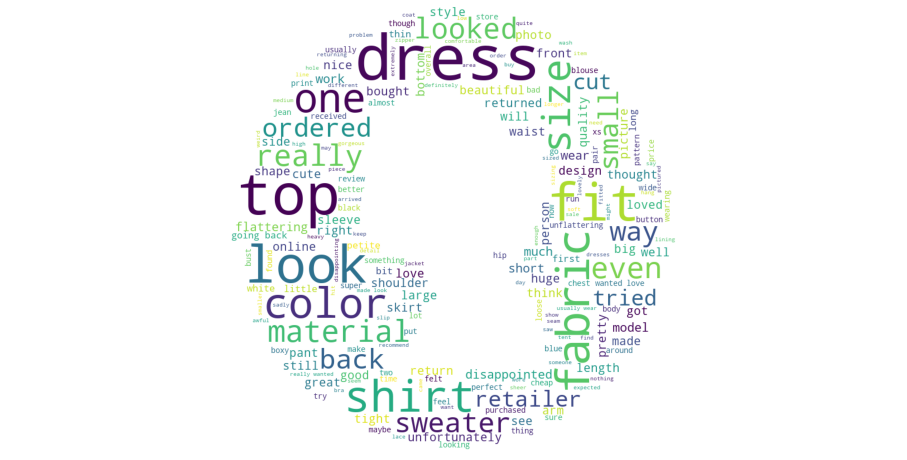

In [48]:
# endereço da imagem:
path = "/content/woman-mask.png"
woman_mask = np.array(Image.open(path))

# Juntando todos os textos em uma só frase:
text = df_baixas["Review Text"]
text = " ".join(s for s in text)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white",
                      width=1600, height=800,
                      max_words=200 , mask=woman_mask).generate(text)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(16,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)

Neste caso decidi usar uma "máscara" da foto de uma mulher de perfil , mas caso prefira , podemos ver apenas as palavras:

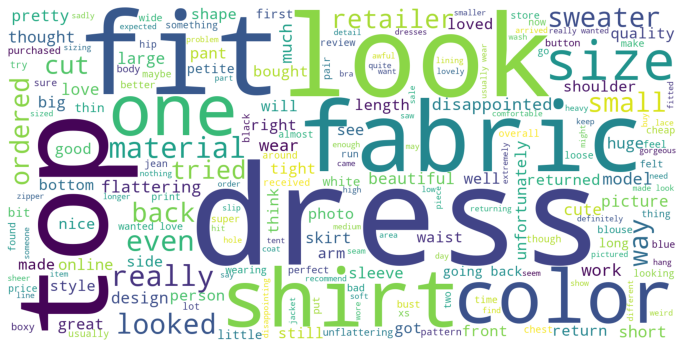

In [49]:
# Juntando todos os textos em uma só frase:
text = df_baixas["Review Text"]
text = " ".join(s for s in text)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white",
                      width=1600, height=800,
                      max_words=200).generate(text)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)

Algumas palavras como "fabric" (tecido) , "material" (material) e "shirt" (camisa) estão maiores , visto que aparecem mais (tem mais recorrências) , isso pode nos indicar algo . Talvez o tecido ou o material não sejam bons , por isso classificados com notas baixas. Tudo isso deve ser analisado mais a fundo para termos uma responta concisa! 

Já que fizemos com os dados de notas baixas , vamos para aqueles que tem notas altas/medias:

### O que as pessoas que deram notas altas achavam?

Vamos separar nossos dados com as notas "altas"

In [50]:
df_altas = df.query("Rating > 2")

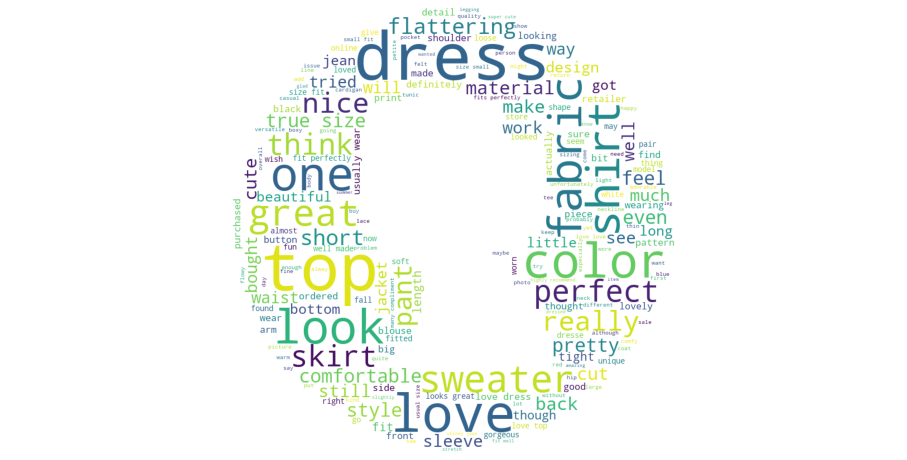

In [51]:
# endereço da imagem:
path = "/content/woman-mask.png"
woman_mask = np.array(Image.open(path))

# Juntando todos os textos em uma só frase:
text = df_altas["Review Text"]
text = " ".join(s for s in text)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white",
                      width=1600, height=800,
                      max_words=200 , mask=woman_mask).generate(text)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(16,12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)

Vamos também visualizar de outra forma essa WordCloud

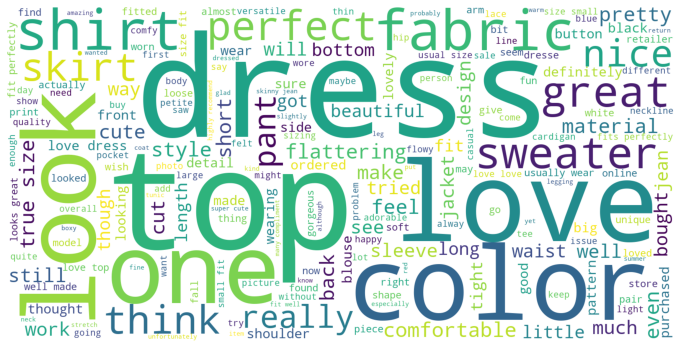

In [52]:
# Juntando todos os textos em uma só frase:
text = df_altas["Review Text"]
text = " ".join(s for s in text)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white",
                      width=1600, height=800,
                      max_words=200).generate(text)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)

Para este caso temos palavras que repetem alguns padrões . Temos a palavras "love" (amor) , "color" (cor) e "top" (algo como muito no topo , bom). Assim , podemos supor que , no geral , as pessoas que comprar nessa loja (que deram notas altas) tendem a gostar das cores ou mesmo que amam o produto. Evidente isso é algo que demanda analises mais profundas, algo que não faremos hoje.

## Conclusões

Neste artigo vimos como criar um modelo de Machine Learning para prever a nota das pessoas em reviews de roupas femininas , com isso podemos , por exemplo , usar o computador para sugerir a nota de um review do usuário baseado no que ele escreveu.

Além disso , vimos como criar uma visualização extremamente interessante para nossas reviews , a chamada **WordCloud** , com ela podemos ver palavras recorrentes em nossos textos!

## Meus Links:

Obrigado por ler até o fim meu artigo , por favor , considere me seguir nas redes sociais:



*   [Medium](https://luis-miguel-code.medium.com/)
*   [LinkedIn](https://github.com/LuisMig-code/)
*   [GitHub](https://www.linkedin.com/in/luis-miguel-code/)
